In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import os
pd.options.mode.chained_assignment = None  

In [4]:
# Get the directory of the current script
current_dir = os.getcwd()

# Construct the path to the data directory
data_dir = os.path.join(current_dir, '..', 'data')

data_dir

'/Users/juliancanalez/Library/Mobile Documents/com~apple~CloudDocs/UT 2023-2024/Summer 2024/fantasy/code/../data'

## Loading & Inspecting Data 

In [19]:
# get all data into data frames
adp = pd.read_csv(os.path.join(data_dir, 'adp.csv'))
players_projected = pd.read_csv(os.path.join(data_dir, 'player_projected_stats.csv'))
injuries_historic = pd.read_csv(os.path.join(data_dir, 'injuries(2021-2023).csv'))
players_historic = pd.read_csv(os.path.join(data_dir, 'weekly_player_stats(2021-2023).csv'))
# weekly_rosters_2021 = pd.read_csv('weekly_rosters_2021.csv')
# weekly_rosters_2022 = pd.read_csv('weekly_rosters_2022.csv')
# weekly_rosters_2023 = pd.read_csv('weekly_rosters_2023.csv')
# weekly_rosters = pd.concat([weekly_rosters_2021, weekly_rosters_2022, weekly_rosters_2023])
# weekly_rosters.drop(columns='Unnamed: 0', inplace=True)
# weekly_rosters.to_csv('weekly_rosters.csv')
weekly_rosters = pd.read_csv(os.path.join(data_dir, 'weekly_rosters.csv'))

# the following was taken from https://www.sportsbettingdime.com/nfl/strength-of-schedule/
defenses_strength_schedule = {
    'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 11, 11, 11, 14, 15, 15, 17, 18, 18, 18, 21, 21, 23, 24, 24, 26, 27, 28, 29, 29, 31, 32],
    'Team': ['PIT', 'NE', 'CLE', 'MIN', 'HOU', 'BAL', 'TEN', 'BUF', 'DAL', 'DEN', 'DET', 'LV', 'NYG', 'GB', 'LAR', 'WAS', 'SF', 'ARI', 'JAX', 'SEA', 'PHI', 'TB', 'CAR', 'KC', 'MIA', 'IND', 'CIN', 'NO', 'CHI', 'NYJ', 'LAC', 'ATL'],
    'Combined Win Totals of 2024-25 Opponents': [154.5, 153.5, 152.5, 150.5, 150, 149, 148, 147.5, 147, 147, 146, 146, 146, 145.5, 145, 145, 144.5, 144, 144, 144, 142.5, 142.5, 141.5, 141, 141, 139, 138.5, 137, 136.5, 136.5, 133, 128.5]
}
defenses_strength_schedule = pd.DataFrame(defenses_strength_schedule)

# print('adp DF:')
# print(adp.head())
# print()
# print('defense_projected DF:')
# print(defense_projected.head())
# print()
# print('players_projected DF:')
# print(players_projected.head())
# print()
# print('injuries_historic DF:')
# print(injuries_historic.head())
# print()
# print('players_historic DF:')
# print(players_historic.head())
# print()
# print('weekly_rosters DF:')
# print(weekly_rosters.head())

## Data Cleaning

In [20]:
# look for null values

# print(adp.isnull().sum())
# print(defense_projected.isnull().sum())
# print(players_projected.isnull().sum())
# print(injuries_historic.isnull().sum())
# print(players_historic.isnull().sum())

# adp, injuries_historic, and players_historic all have some null values --> fill values
adp.fillna(0, inplace=True)
injuries_historic.fillna('None', inplace=True)
players_historic.fillna(0, inplace=True)

# we only care about certain info from weekly roster df
include_cols = ['season', 'team', 'position', 'status', 'player_name', 'week', 'game_type']
weekly_rosters = weekly_rosters[include_cols]

In [21]:
# clean data --> take away player data that will not be used
# adp_duplicates = adp['longName'].duplicated().sum()
# players_projected_duplicates = players_projected.duplicated(subset=['longName', 'week']).sum()
# injuries_historic_duplicates = injuries_historic.duplicated(subset=['full_name', 'week', 'season']).sum()
# players_historic_duplicates = players_historic.duplicated(subset=['player_display_name', 'week', 'season']).sum()

# print('adp_duplicates: ', adp_duplicates)
# print('players_projected_duplicates: ', players_projected_duplicates)
# print('injuries_historic_duplicates: ', injuries_historic_duplicates)
# print('players_historic_duplicates: ', players_historic_duplicates)

# injuries_historic_duplicate_cols = injuries_historic.duplicated(subset=['full_name', 'week', 'season'], keep=False)
# print(injuries_historic[injuries_historic_duplicate_cols])

# we see that the only duplicates are when players were traded and appeared on both teams in injury reports and 
# Josh Allen defennse/offense player

# Since we are only keeping offensive players in injury report --> can use name as key

# keep only offensive players in injury report as we can only draft offensive players
offensive_positions = ['QB', 'RB', 'WR', 'TE', 'K']
injuries_historic = injuries_historic[injuries_historic['position'].isin(offensive_positions)]
weekly_rosters = weekly_rosters[weekly_rosters['position'].isin(offensive_positions)]
players_historic = players_historic[players_historic['position'].isin(offensive_positions)]

# take away all players that are not in players active/relevant in 2024
players = adp['longName'].unique()

injuries_historic = injuries_historic[injuries_historic['full_name'].isin(players)]
players_historic = players_historic[players_historic['player_display_name'].isin(players)]
weekly_rosters = weekly_rosters[weekly_rosters['player_name'].isin(players)]

In [5]:
# update csv files in directory
# injuries_historic.to_csv('injuries(2021-2023).csv', index=False)
# players_historic.to_csv('weekly_player_stats(2021-2023).csv', index=False)
# weekly_rosters.to_csv('weekly_rosters.csv', index=False)

In [6]:
# now we can use player name as key for each df
# let's check to make sure all data types that will be used for numeric calculations are numeric types
print(adp.dtypes)
print(defense_projected.dtypes)
print(players_projected.dtypes)
print(injuries_historic.dtypes)
print(players_historic.dtypes)


posADP         object
overallADP    float64
playerID      float64
longName       object
dtype: object
returnTD                float64
defTD                   float64
safeties                float64
teamID                    int64
fumbleRecoveries        float64
ptsAgainst              float64
teamAbv                  object
interceptions           float64
sacks                   float64
blockKick               float64
fantasyPointsDefault    float64
week                      int64
dtype: object
twoPointConversion               float64
fumblesLost                      float64
pos                               object
teamID                             int64
team                              object
longName                          object
playerID                           int64
Rushing.rushYds                  float64
Rushing.carries                  float64
Rushing.rushTD                   float64
Passing.passAttempts             float64
Passing.passTD                   float64
Passing.

In [7]:
# need to clear cols that are not of interest

adp.drop(columns='playerID', inplace=True)
defense_projected.drop(columns='teamID', inplace=True)
players_projected.drop(columns=['teamID', 'playerID'], inplace=True)
injuries_historic.drop(columns='gsis_id', inplace=True)
players_historic.drop(columns=['player_id', 'player_name', 'position_group'], inplace=True)

## Gathering Descriptive Statistics

In [8]:
# descriptive stats for defense projected 
defense_projected_stats = defense_projected.describe(include=np.number)
print('Descriptive Statistics for Defense Projected')
print(defense_projected_stats)

Descriptive Statistics for Defense Projected
         returnTD       defTD    safeties  fumbleRecoveries  ptsAgainst  \
count  576.000000  576.000000  576.000000        576.000000  576.000000   
mean     0.012153    0.110417    0.066319          0.498264   20.337674   
std      0.032702    0.045636    0.047303          0.142024    6.047417   
min      0.000000    0.000000    0.000000          0.000000    0.000000   
25%      0.000000    0.100000    0.000000          0.500000   18.500000   
50%      0.000000    0.100000    0.100000          0.500000   21.000000   
75%      0.000000    0.100000    0.100000          0.600000   23.800000   
max      0.100000    0.200000    0.100000          0.700000   31.300000   

       interceptions       sacks   blockKick  fantasyPointsDefault        week  
count     576.000000  576.000000  576.000000            576.000000  576.000000  
mean        0.702257    2.240625    0.071354              8.723438    9.500000  
std         0.204161    0.633924    

In [9]:
# create a plot that showcases all teams average points across all weeks with lowest sd
# group by team and calculate mean and standard deviation of fantasy points
team_stats = defense_projected.groupby('teamAbv')['fantasyPointsDefault'].agg(['mean', 'std']).reset_index()

# sort by mean to identify the teams with the highest average points
team_stats_sorted = team_stats.sort_values(by='mean', ascending=False)

# Display the team statistics
print("Team Statistics (Sorted by Mean Fantasy Points):")
print(team_stats_sorted.head(15))

Team Statistics (Sorted by Mean Fantasy Points):
   teamAbv       mean       std
28      SF  10.538889  1.056709
8      DAL  10.022222  2.057284
2      BAL   9.811111  1.320378
3      BUF   9.661111  1.663851
15      KC   9.655556  1.718831
22      NO   9.533333  1.518901
7      CLE   9.477778  1.612289
1      ATL   9.450000  1.539385
26     PIT   9.383333  1.548909
14     JAX   9.311111  1.532736
19     MIA   9.261111  1.949099
25     PHI   9.144444  2.150027
11      GB   9.022222  1.573888
21      NE   8.911111  1.714262
24     NYJ   8.811111  1.486761


In [10]:
# descriptive stats for offensive projected with grouping by position
players_projected_stats = players_projected.groupby('pos').describe(include=np.number)
print('Grouped Descriptive Statistics for Offense/Players by Position:')
print(players_projected_stats)
# players_projected_stats.to_csv('players_projected_descriptive_stats.csv')

Grouped Descriptive Statistics for Offense/Players by Position:
    twoPointConversion                                               \
                 count      mean       std  min  25%  50%  75%  max   
pos                                                                   
FB                51.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
QB               562.0  0.091993  0.094727  0.0  0.1  0.1  0.1  1.2   
RB              1522.0  0.014455  0.035176  0.0  0.0  0.0  0.0  0.1   
TE              1285.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
WR              2490.0  0.004900  0.021590  0.0  0.0  0.0  0.0  0.1   

    fumblesLost            ... fantasyPointsDefault.halfPPR           week  \
          count      mean  ...                          75%    max   count   
pos                        ...                                               
FB         51.0  0.000000  ...                       1.2550   2.55    51.0   
QB        562.0  0.222598  ...                      18.

In [11]:
# get some insight on injury (Out or Questionable) frequency (from players not on IR)
injury_frequency = injuries_historic.groupby(['season', 'full_name']).size().reset_index(name='injury_count')
print("Injury Frequency by Year and Player:")
print(injury_frequency.head())

Injury Frequency by Year and Player:
   season           full_name  injury_count
0    2021          A.J. Brown            13
1    2021         Aaron Jones            10
2    2021       Aaron Rodgers             8
3    2021        Adam Thielen             7
4    2021  Alexander Mattison             4


In [12]:
# now need descriptive stats for historic data 
players_historic_stats = players_historic.groupby(['position', 'season']).describe(include=np.number)
print('Descriptive Statistics for Players Historic')
print(players_historic_stats)
# players_historic_stats.to_csv('players_historic_descriptive_stats.csv')

Descriptive Statistics for Players Historic
                Unnamed: 0                                                \
                     count          mean          std      min       25%   
position season                                                            
FB       2021         18.0    493.500000     5.338539    485.0    489.25   
         2022         15.0   5951.000000     4.472136   5944.0   5947.50   
         2023         12.0  11447.500000     3.605551  11442.0  11444.75   
QB       2021        436.0   2725.559633  1930.646589      0.0    862.75   
         2022        462.0   8069.045455  1785.139965   5698.0   6185.25   
         2023        543.0  13720.281768  1693.619775  11329.0  12183.50   
RB       2021        603.0   3544.774461  1316.050560    712.0   2509.50   
         2022        840.0   8799.126190  1477.600081   6112.0   7535.75   
         2023       1045.0  14394.067943  1507.674410  11587.0  13117.00   
TE       2021        478.0   3153.776151  14

In [13]:
# need descriptive stats on weekly rosters
# main purpose of this data is to determine if a player was listed as non active player in pre-game roster
weekly_rosters_filtered = weekly_rosters[weekly_rosters['status'] != 'ACT']
status_count = weekly_rosters_filtered.groupby(['season', 'player_name']).size().reset_index(name='outCount')
status_count = status_count.merge(weekly_rosters_filtered[['position', 'player_name']], how='right', on='player_name')
status_count.drop_duplicates(inplace=True)
# Display the result
print(status_count.head())



    season    player_name  outCount position
0     2021  Aaron Rodgers         1       QB
1     2023  Aaron Rodgers        16       QB
32    2021     Joe Flacco         4       QB
33    2022     Joe Flacco         3       QB
34    2023     Joe Flacco         1       QB


## Data Visualizations 

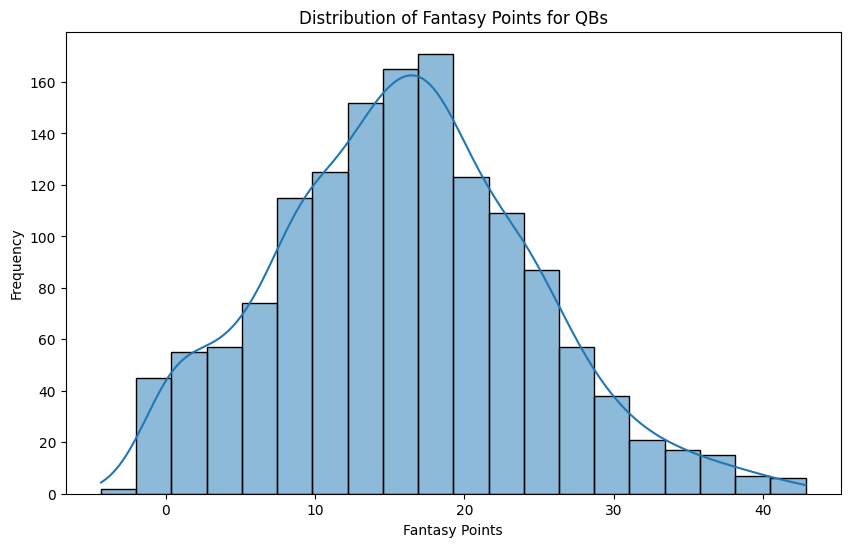

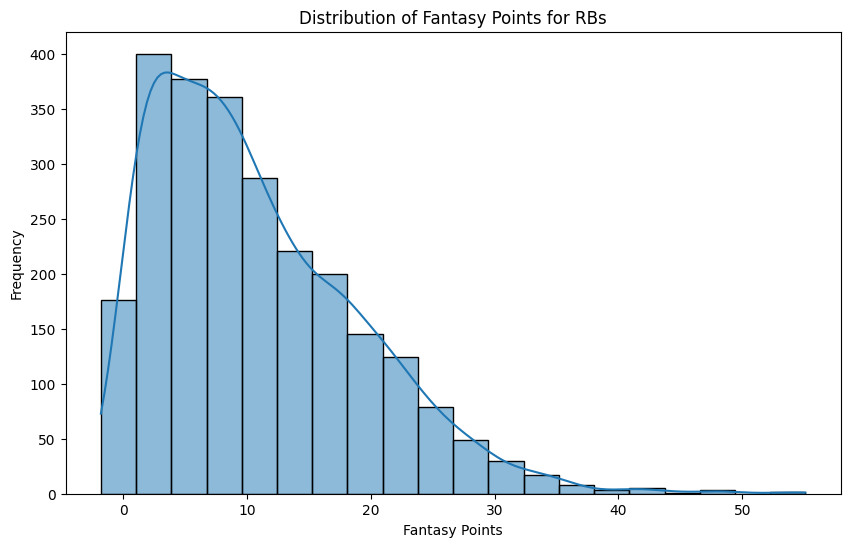

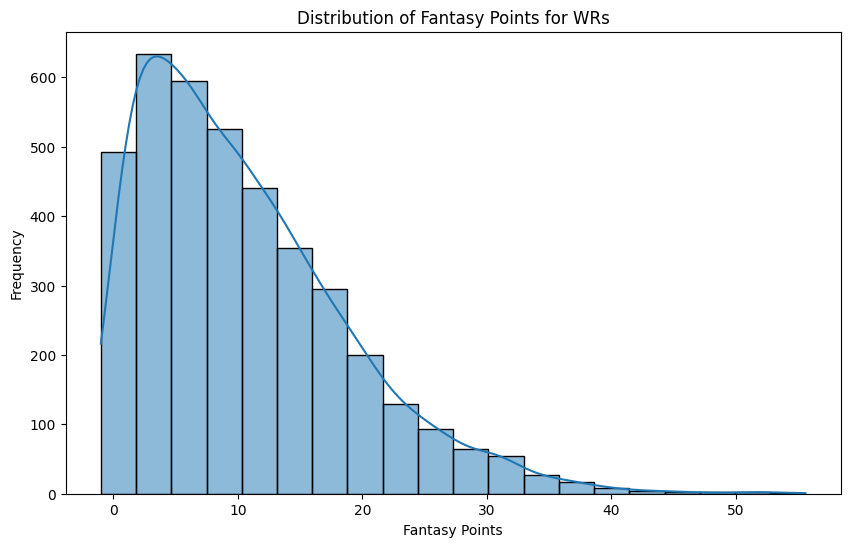

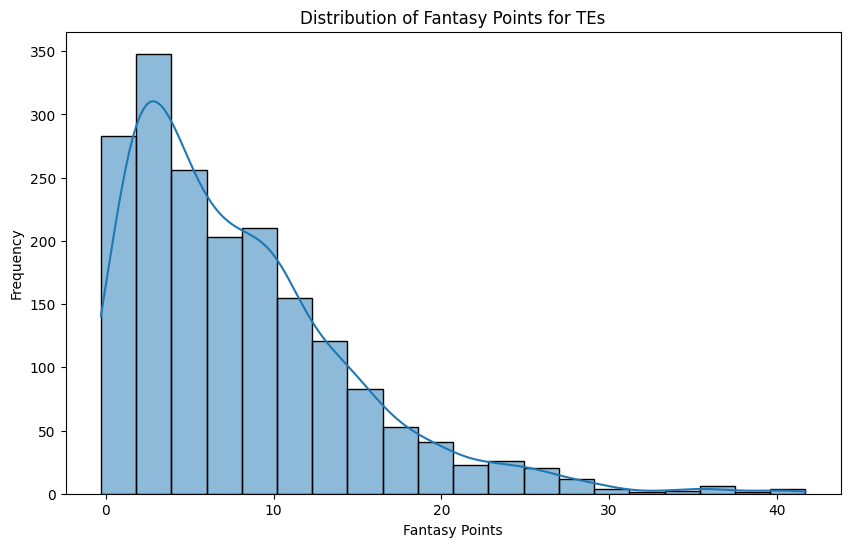

In [14]:
# start by visualizing player position performence by fantasy points (historic)
offensive_positions.remove('K')

for position in offensive_positions:
    plt.figure(figsize=(10, 6))
    sns.histplot(players_historic[players_historic['position'] == position]['fantasy_points_ppr'], bins=20, kde=True)
    plt.title(f'Distribution of Fantasy Points for {position}s')
    plt.xlabel('Fantasy Points')
    plt.ylabel('Frequency')
    plt.show()


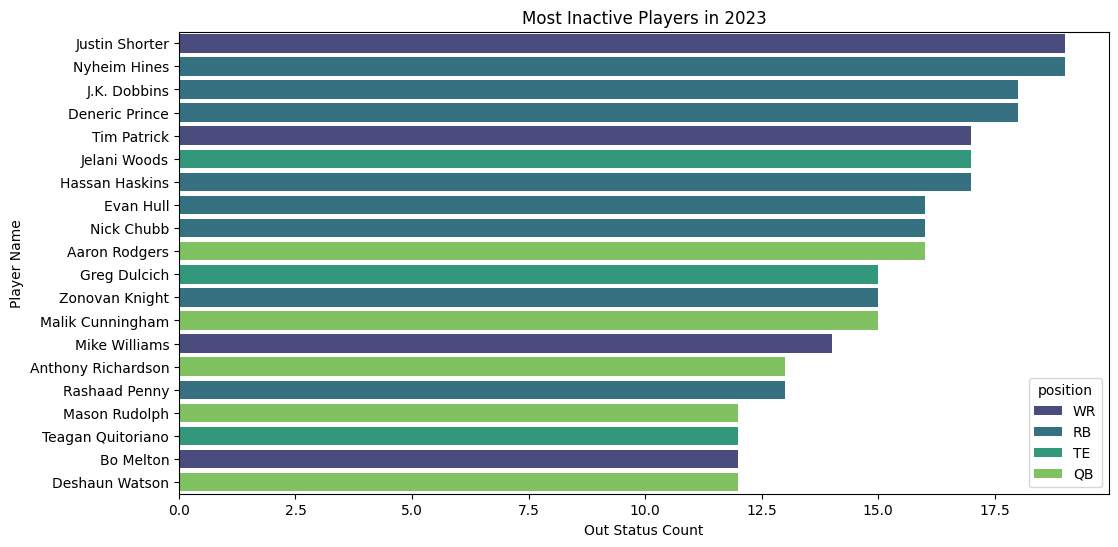

In [15]:
# get a visual on player injury history
status_counts_2023 = status_count[status_count['season'] == 2023]
top_20_injured_players_in_2023 = status_counts_2023.sort_values(by='outCount', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='outCount', y='player_name', data=top_20_injured_players_in_2023, palette='viridis', hue='position')
plt.title('Most Inactive Players in 2023')
plt.xlabel('Out Status Count')
plt.ylabel('Player Name')
plt.show()

In [39]:
# a method to see activity history of a given player
def show_injury_details(player_name, df, seasons=[2021, 2022, 2023]):
    # Filter data for the given player and the past three seasons
    player_injuries = df[(df['player_name'] == player_name) & (df['season'].isin(seasons))]
    
    # Check if there are any records
    if player_injuries.empty:
        print(f"No injury records found for {player_name} in the past {len(seasons)} seasons.")
    else:
        print(f"Injury details for {player_name} in the past {len(seasons)} seasons:")
        print(player_injuries)

show_injury_details('Christian McCaffrey', status_count)

Injury details for Christian McCaffrey in the past 3 seasons:
     season          player_name  outCount position
209    2021  Christian McCaffrey        10       RB
210    2023  Christian McCaffrey         1       RB


# Correlation Analysis

In [17]:
# filter df 
players_historic_filtered = players_historic.drop(columns=['Unnamed: 0', 'week', 'season', 'fantasy_points', 'special_teams_tds'])


### Correlation Matrix for Quarterbacks

In [42]:
# drop all non-numeric cols
players_historic_filtered_qb = players_historic_filtered[players_historic_filtered['position'] == 'QB']
players_historic_filtered_qb = players_historic_filtered_qb.select_dtypes(include='number')
players_historic_filtered_qb = players_historic_filtered_qb[players_historic_filtered_qb.columns.drop(list(players_historic_filtered_qb.filter(regex='receiving')))]
players_historic_filtered_qb.drop(columns=['receptions', 'targets', 'racr', 'target_share', 'air_yards_share', 'wopr'], inplace=True)

# explore skewness 
qb_skewness = players_historic_filtered_qb.skew(axis=0)
print("Skewness of Features:")
print(qb_skewness)

Skewness of Features:
completions                 -0.580612
attempts                    -0.747921
passing_yards               -0.449348
passing_tds                  0.662372
interceptions                1.298332
sacks                        0.827811
sack_yards                   0.999796
sack_fumbles                 1.825076
sack_fumbles_lost            3.006288
passing_air_yards           -0.130839
passing_yards_after_catch    0.078117
passing_first_downs         -0.189919
passing_epa                 -0.010820
passing_2pt_conversions      3.679975
pacr                         1.246476
dakota                       0.608055
carries                      1.379764
rushing_yards                2.011520
rushing_tds                  2.617800
rushing_fumbles              2.622382
rushing_fumbles_lost         3.915408
rushing_first_downs          1.694086
rushing_epa                  0.566327
rushing_2pt_conversions      7.249195
fantasy_points_ppr           0.235287
dtype: float64


In [43]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_features = pt.fit_transform(players_historic_filtered_qb)

# Create a new DataFrame with the transformed features
players_historic_filtered_qb_transformed = pd.DataFrame(transformed_features, columns=players_historic_filtered_qb.columns)

# Check skewness after transformation
print("Skewness After Yeo-Johnson Transformation:")
print(players_historic_filtered_qb_transformed.skew())


Skewness After Yeo-Johnson Transformation:
completions                 -0.237185
attempts                    -0.266528
passing_yards               -0.441950
passing_tds                 -0.038064
interceptions                0.285486
sacks                       -0.044673
sack_yards                  -0.182419
sack_fumbles                 1.111406
sack_fumbles_lost            2.320285
passing_air_yards           -0.325963
passing_yards_after_catch   -0.240072
passing_first_downs         -0.125080
passing_epa                 -0.001605
passing_2pt_conversions      3.350671
pacr                         0.078340
dakota                       0.021382
carries                     -0.016224
rushing_yards               -0.084386
rushing_tds                  1.839707
rushing_fumbles              1.889326
rushing_fumbles_lost         3.915408
rushing_first_downs          0.099484
rushing_epa                  0.017414
rushing_2pt_conversions      7.249195
fantasy_points_ppr          -0.085685
dtype: 

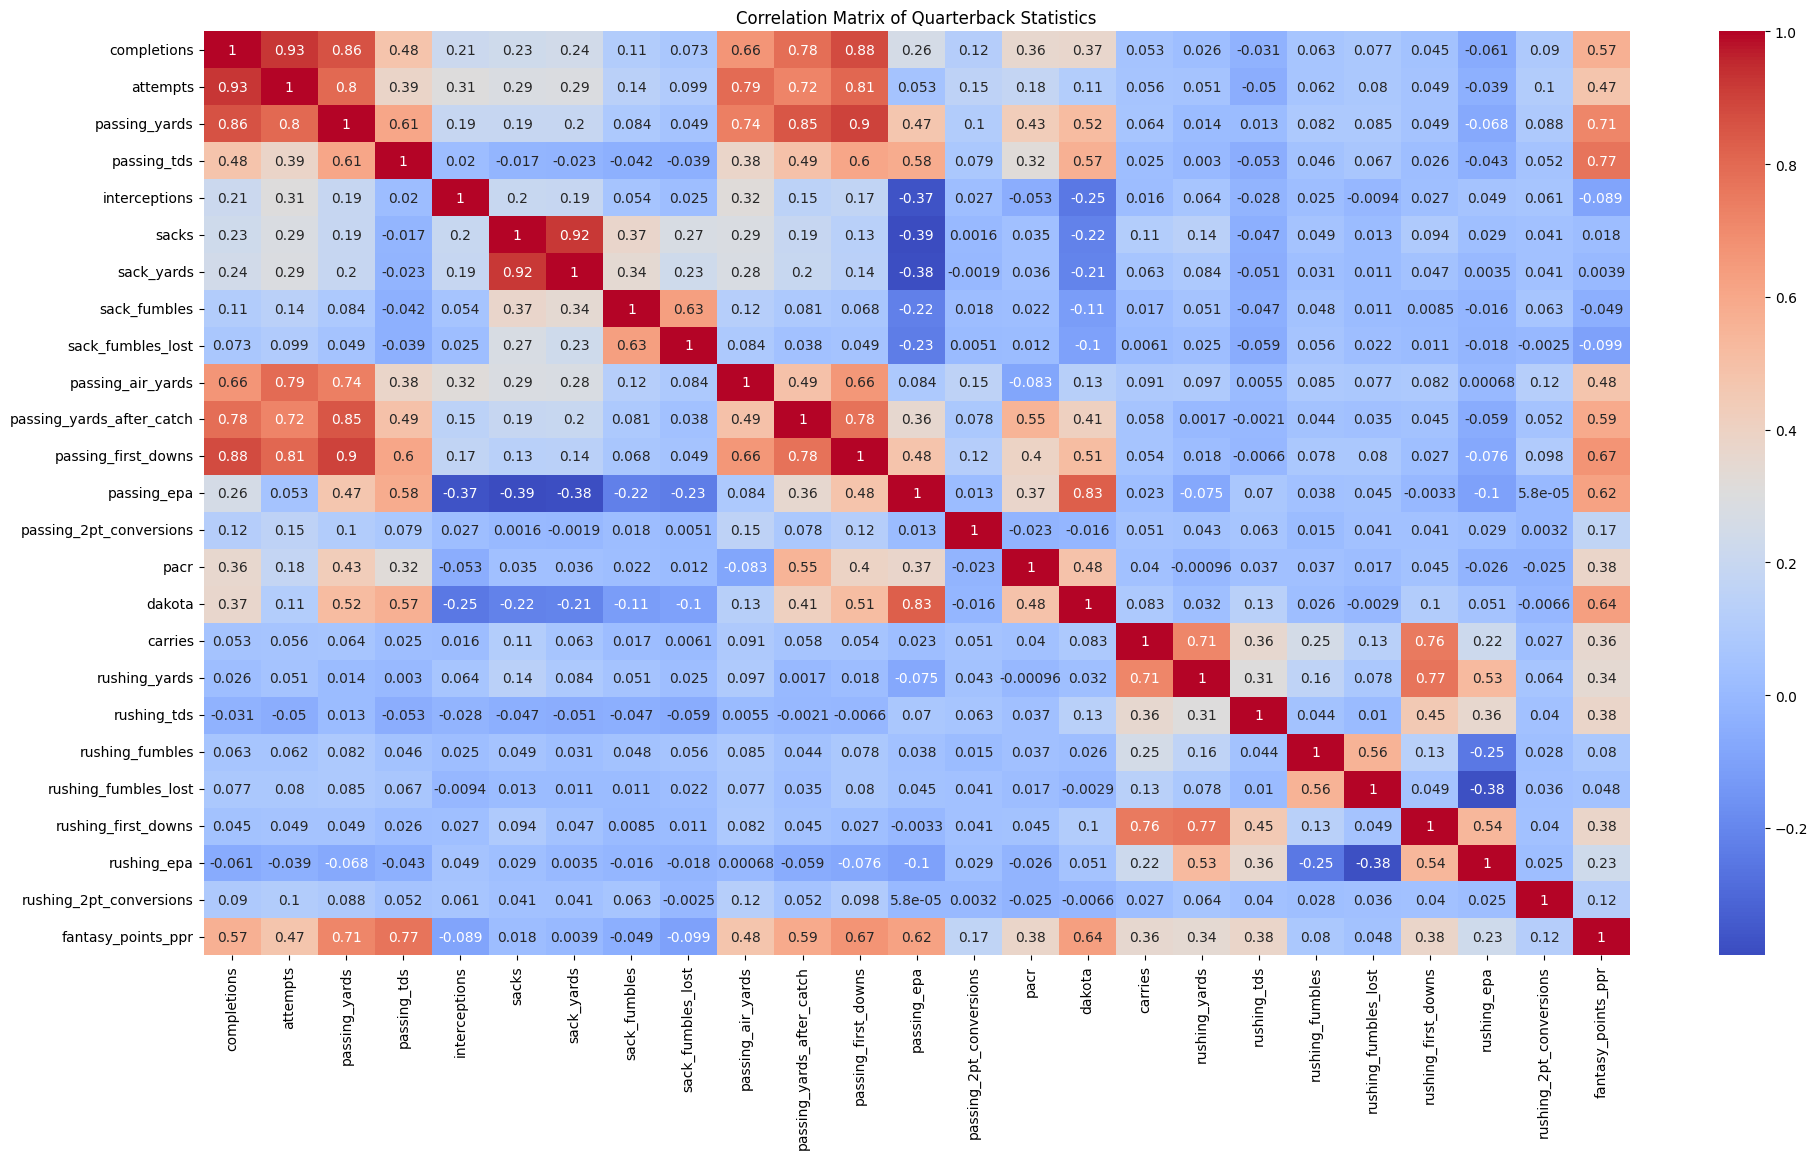

In [44]:
plt.figure(figsize=(23, 12))
qb_correlation_matrix = players_historic_filtered_qb_transformed.corr()
sns.heatmap(qb_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Quarterback Statistics')
plt.show()

In [45]:
# we can now see what features are most correlated with fantasy points
# Extract the correlations with fantasy points PPR
fantasy_points_corr_qb = qb_correlation_matrix['fantasy_points_ppr']

# Sort the correlations in descending order, excluding the correlation of the feature with itself
sorted_fantasy_points_corr_qb = fantasy_points_corr_qb.drop('fantasy_points_ppr').sort_values(ascending=False)

# Display the sorted correlations
print("Features Correlated with Fantasy Points PPR for QBs (Ranked):")
print(sorted_fantasy_points_corr_qb)

Features Correlated with Fantasy Points PPR for QBs (Ranked):
passing_tds                  0.769014
passing_yards                0.713907
passing_first_downs          0.672346
dakota                       0.635205
passing_epa                  0.621201
passing_yards_after_catch    0.588667
completions                  0.568088
passing_air_yards            0.476634
attempts                     0.472852
pacr                         0.380125
rushing_tds                  0.376912
rushing_first_downs          0.375518
carries                      0.357888
rushing_yards                0.342443
rushing_epa                  0.228649
passing_2pt_conversions      0.166051
rushing_2pt_conversions      0.117413
rushing_fumbles              0.079959
rushing_fumbles_lost         0.048048
sacks                        0.018370
sack_yards                   0.003940
sack_fumbles                -0.048958
interceptions               -0.089288
sack_fumbles_lost           -0.099367
Name: fantasy_points_ppr, 

### Correlation Matrix for Wide Receivers

In [48]:
players_historic_filtered_wr = players_historic_filtered[players_historic_filtered['position'] == 'WR']
players_historic_filtered_wr = players_historic_filtered_wr.select_dtypes(include='number')
players_historic_filtered_wr = players_historic_filtered_wr[players_historic_filtered_wr.columns.drop(list(players_historic_filtered_wr.filter(regex='passing')))]
players_historic_filtered_wr.drop(columns=['completions', 'attempts', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles', 'sack_fumbles_lost', 'pacr', 'dakota', 'rushing_2pt_conversions'], inplace=True)

# explore skewness 
wr_skewness = players_historic_filtered_wr.skew(axis=0)
print("Skewness of Features:")
print(wr_skewness)

Skewness of Features:
carries                         3.529310
rushing_yards                   5.311229
rushing_tds                    11.128096
rushing_fumbles                19.786371
rushing_fumbles_lost           36.221529
rushing_first_downs             4.586926
rushing_epa                    -0.228421
receptions                      0.862671
targets                         0.685886
receiving_yards                 1.120182
receiving_tds                   1.866299
receiving_fumbles               5.060340
receiving_fumbles_lost          6.653367
receiving_air_yards             0.981949
receiving_yards_after_catch     1.843907
receiving_first_downs           0.995733
receiving_epa                   0.303557
receiving_2pt_conversions       8.452535
racr                            9.253835
target_share                    0.511706
air_yards_share                 0.601014
wopr                            0.459353
fantasy_points_ppr              1.107462
dtype: float64


In [49]:
# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_features = pt.fit_transform(players_historic_filtered_wr)

# Create a new DataFrame with the transformed features
players_historic_filtered_wr_transformed = pd.DataFrame(transformed_features, columns=players_historic_filtered_wr.columns)

# Check skewness after transformation
print("Skewness After Yeo-Johnson Transformation:")
print(players_historic_filtered_wr_transformed.skew())

Skewness After Yeo-Johnson Transformation:
carries                         1.907347
rushing_yards                  -4.916593
rushing_tds                    10.474780
rushing_fumbles                19.786371
rushing_fumbles_lost           36.221529
rushing_first_downs             3.584060
rushing_epa                    -0.594401
receptions                     -0.034945
targets                        -0.046707
receiving_yards                -0.112734
receiving_tds                   1.131913
receiving_fumbles               4.759758
receiving_fumbles_lost          6.469168
receiving_air_yards             0.069407
receiving_yards_after_catch    -0.089429
receiving_first_downs          -0.030673
receiving_epa                  -0.014892
receiving_2pt_conversions       8.452535
racr                           -0.037472
target_share                    0.036751
air_yards_share                 0.027051
wopr                            0.011959
fantasy_points_ppr             -0.058500
dtype: float64

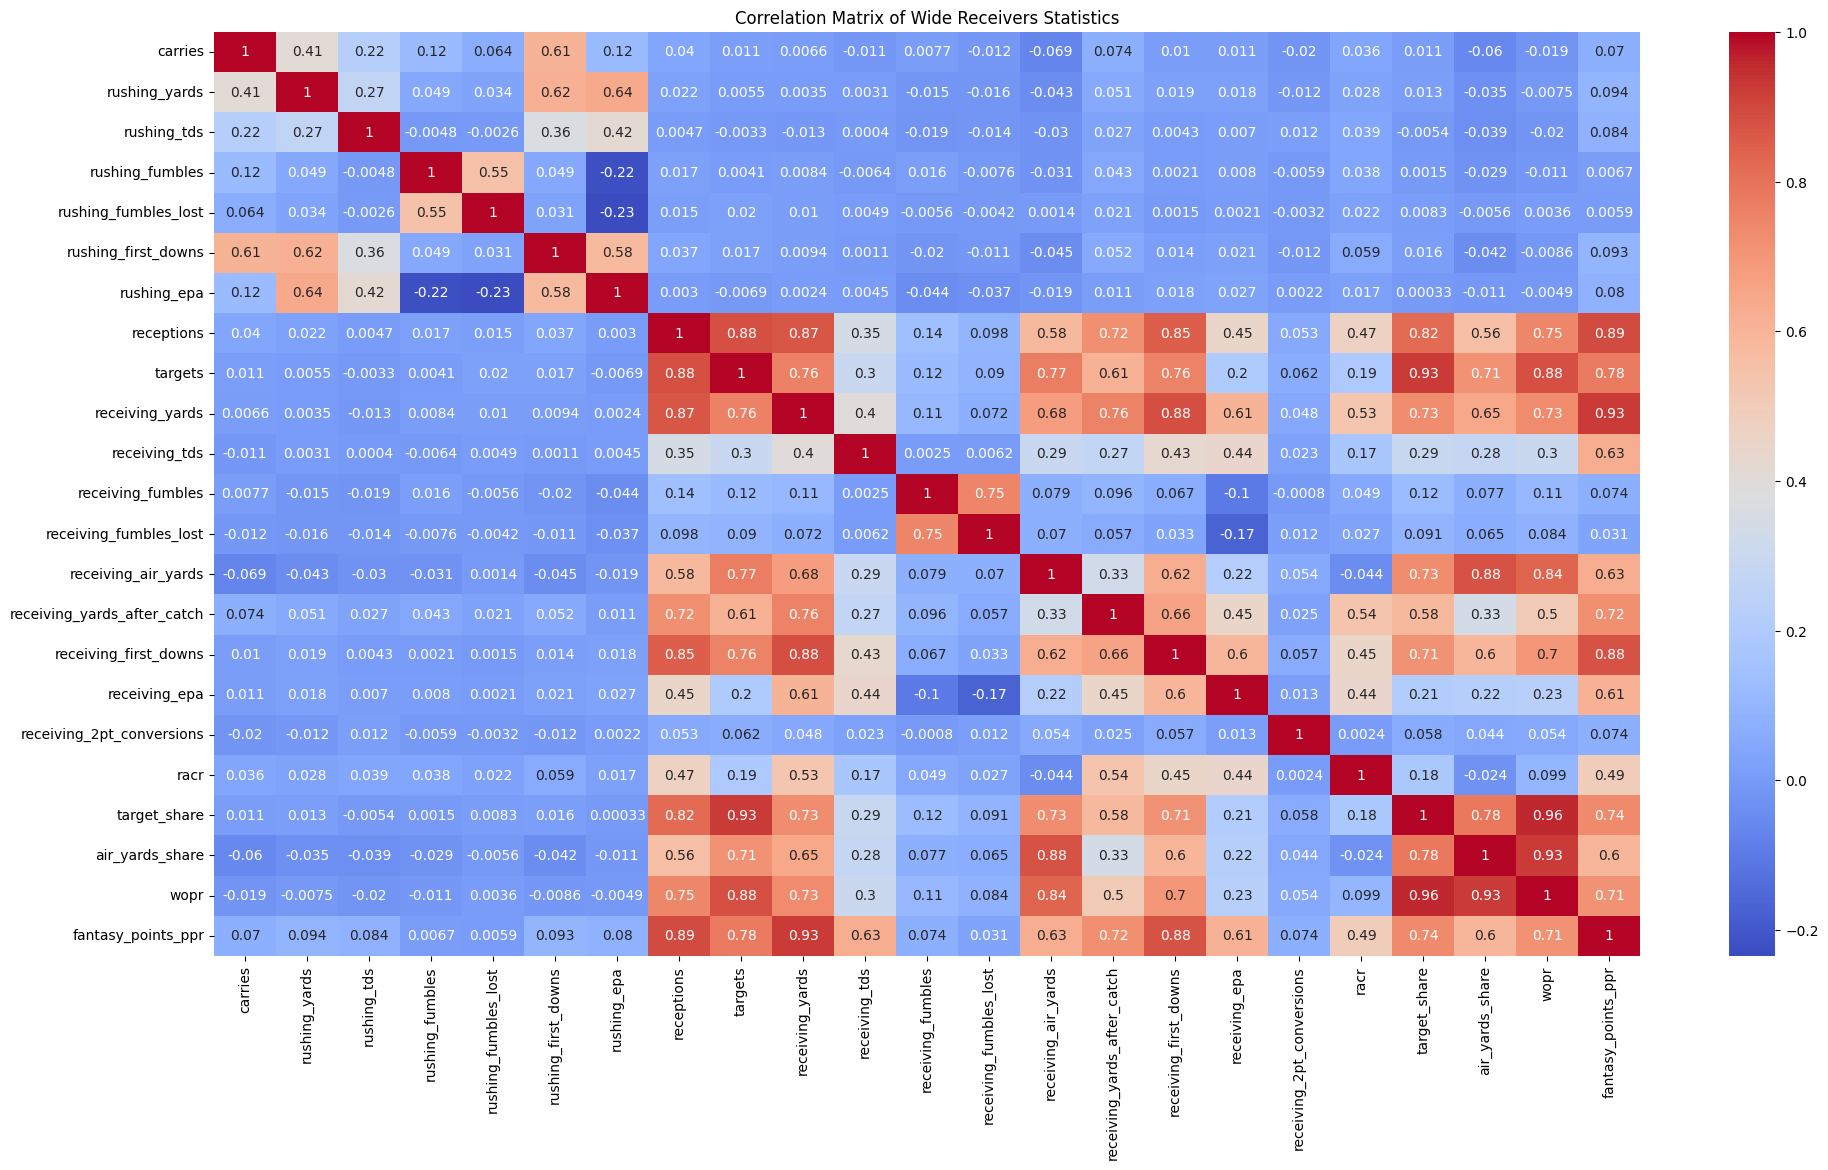

In [50]:
plt.figure(figsize=(23, 12))
wr_correlation_matrix = players_historic_filtered_wr_transformed.corr()
sns.heatmap(wr_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wide Receivers Statistics')
plt.show()

In [51]:
# we can now see what features are most correlated with fantasy points
# Extract the correlations with fantasy points PPR
fantasy_points_corr_wr = wr_correlation_matrix['fantasy_points_ppr']

# Sort the correlations in descending order, excluding the correlation of the feature with itself
sorted_fantasy_points_corr_wr = fantasy_points_corr_wr.drop('fantasy_points_ppr').sort_values(ascending=False)

# Display the sorted correlations
print("Features Correlated with Fantasy Points PPR for WRs (Ranked):")
print(sorted_fantasy_points_corr_wr)

Features Correlated with Fantasy Points PPR for WRs (Ranked):
receiving_yards                0.926679
receptions                     0.890598
receiving_first_downs          0.876402
targets                        0.775755
target_share                   0.736471
receiving_yards_after_catch    0.720323
wopr                           0.714167
receiving_air_yards            0.625306
receiving_tds                  0.625101
receiving_epa                  0.610090
air_yards_share                0.597075
racr                           0.491962
rushing_yards                  0.094101
rushing_first_downs            0.093474
rushing_tds                    0.083839
rushing_epa                    0.079709
receiving_fumbles              0.074391
receiving_2pt_conversions      0.073902
carries                        0.069859
receiving_fumbles_lost         0.031189
rushing_fumbles                0.006679
rushing_fumbles_lost           0.005877
Name: fantasy_points_ppr, dtype: float64


### Correlation Matrix for Running Backs

In [53]:
# drop all non-numeric cols
players_historic_filtered_rb = players_historic_filtered[players_historic_filtered['position'] == 'RB']
players_historic_filtered_rb = players_historic_filtered_rb.select_dtypes(include='number')
players_historic_filtered_rb = players_historic_filtered_rb[players_historic_filtered_rb.columns.drop(list(players_historic_filtered_rb.filter(regex='passing')))]
players_historic_filtered_rb.drop(columns=['completions', 'attempts', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles', 'sack_fumbles_lost', 'pacr', 'dakota',], inplace=True)

# explore skewness 
rb_skewness = players_historic_filtered_rb.skew(axis=0)
print("Skewness of Features:")
print(rb_skewness)

Skewness of Features:
carries                         0.557077
rushing_yards                   1.050397
rushing_tds                     1.946199
rushing_fumbles                 3.822815
rushing_fumbles_lost            4.700276
rushing_first_downs             0.997594
rushing_epa                    -0.031716
rushing_2pt_conversions        10.181741
receptions                      1.223318
targets                         1.232726
receiving_yards                 1.751480
receiving_tds                   3.978717
receiving_fumbles               6.401351
receiving_fumbles_lost          8.780401
receiving_air_yards             1.517797
receiving_yards_after_catch     1.669783
receiving_first_downs           1.710750
receiving_epa                  -0.003929
receiving_2pt_conversions      14.948433
racr                            1.735160
target_share                    0.935109
air_yards_share               -12.034311
wopr                            0.987878
fantasy_points_ppr              1.0

In [54]:
# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_features = pt.fit_transform(players_historic_filtered_rb)

# Create a new DataFrame with the transformed features
players_historic_filtered_rb_transformed = pd.DataFrame(transformed_features, columns=players_historic_filtered_rb.columns)

# Check skewness after transformation
print("Skewness After Yeo-Johnson Transformation:")
print(players_historic_filtered_rb_transformed.skew())

Skewness After Yeo-Johnson Transformation:
carries                        -0.105917
rushing_yards                  -0.066871
rushing_tds                     1.077415
rushing_fumbles                 3.436424
rushing_fumbles_lost            4.581704
rushing_first_downs            -0.030954
rushing_epa                    -0.071588
rushing_2pt_conversions         9.448108
receptions                     -0.014391
targets                        -0.028219
receiving_yards                -0.402165
receiving_tds                   3.098552
receiving_fumbles               5.848354
receiving_fumbles_lost          8.257250
receiving_air_yards            -0.016955
receiving_yards_after_catch    -0.138964
receiving_first_downs           0.319636
receiving_epa                  -0.062266
receiving_2pt_conversions      14.948433
racr                           -0.041267
target_share                    0.096358
air_yards_share                 0.740992
wopr                           -0.396700
fantasy_points

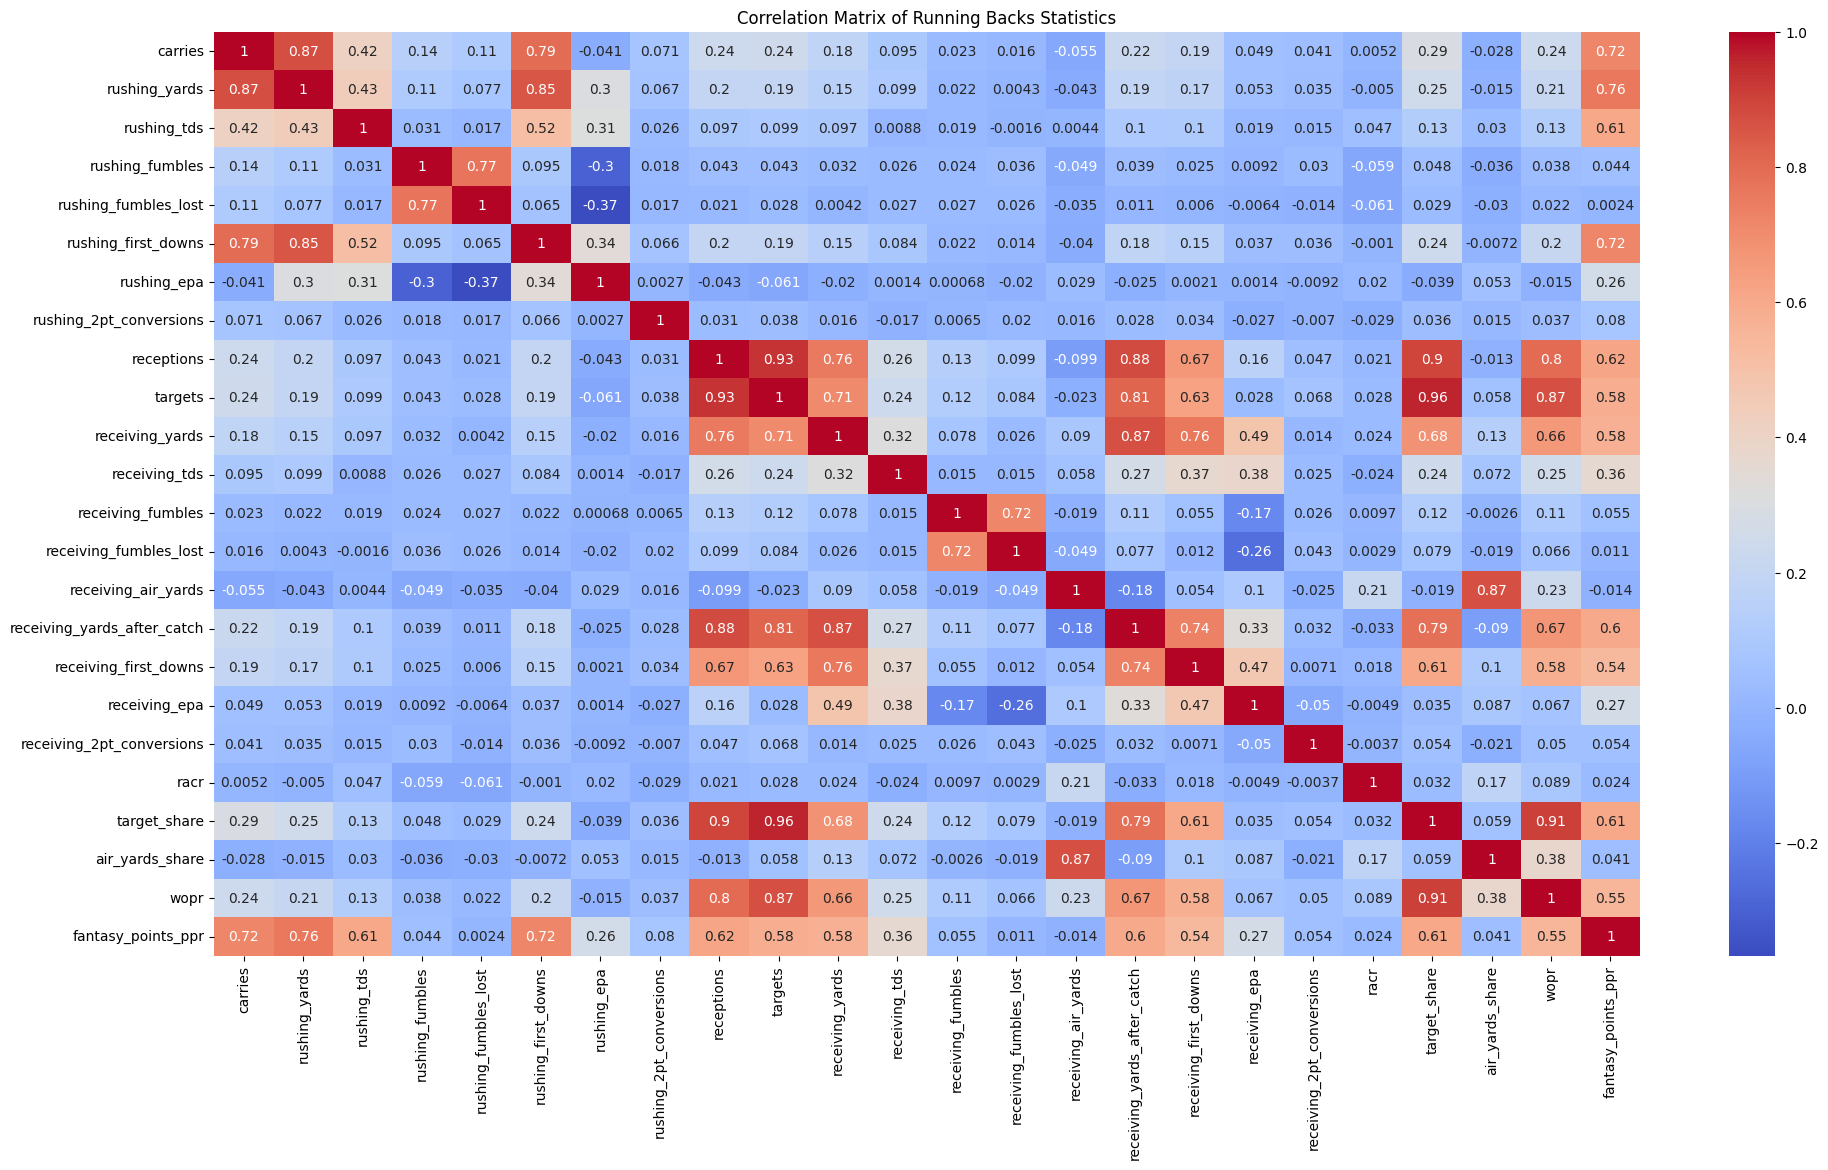

In [55]:
plt.figure(figsize=(23, 12))
rb_correlation_matrix = players_historic_filtered_rb_transformed.corr()
sns.heatmap(rb_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Running Backs Statistics')
plt.show()

In [56]:
# we can now see what features are most correlated with fantasy points
# Extract the correlations with fantasy points PPR
fantasy_points_corr_rb = rb_correlation_matrix['fantasy_points_ppr']

# Sort the correlations in descending order, excluding the correlation of the feature with itself
sorted_fantasy_points_corr_rb = fantasy_points_corr_rb.drop('fantasy_points_ppr').sort_values(ascending=False)

# Display the sorted correlations
print("Features Correlated with Fantasy Points PPR for RBs (Ranked):")
print(sorted_fantasy_points_corr_rb)

Features Correlated with Fantasy Points PPR for RBs (Ranked):
rushing_yards                  0.760367
rushing_first_downs            0.721005
carries                        0.717233
receptions                     0.616930
rushing_tds                    0.608531
target_share                   0.605528
receiving_yards_after_catch    0.602987
targets                        0.584901
receiving_yards                0.577776
wopr                           0.553581
receiving_first_downs          0.540397
receiving_tds                  0.360063
receiving_epa                  0.266041
rushing_epa                    0.262847
rushing_2pt_conversions        0.079699
receiving_fumbles              0.055078
receiving_2pt_conversions      0.053740
rushing_fumbles                0.044445
air_yards_share                0.040593
racr                           0.024095
receiving_fumbles_lost         0.010745
rushing_fumbles_lost           0.002431
receiving_air_yards           -0.014079
Name: fantasy_poin

### Correlation Matrix for Tight Ends

In [58]:
# drop all non-numeric cols
players_historic_filtered_te = players_historic_filtered[players_historic_filtered['position'] == 'TE']
players_historic_filtered_te = players_historic_filtered_te.select_dtypes(include='number')
players_historic_filtered_te = players_historic_filtered_te[players_historic_filtered_te.columns.drop(list(players_historic_filtered_te.filter(regex='passing')))]
players_historic_filtered_te.drop(columns=['completions', 'attempts', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles', 'sack_fumbles_lost', 'pacr', 'dakota', 'rushing_fumbles_lost', 'rushing_2pt_conversions'], inplace=True)

# explore skewness 
te_skewness = players_historic_filtered_te.skew(axis=0)
print("Skewness of Features:")
print(te_skewness)

Skewness of Features:
carries                         5.162134
rushing_yards                   8.495075
rushing_tds                    21.465050
rushing_fumbles                43.034870
rushing_first_downs             8.619752
rushing_epa                    -3.179366
receptions                      1.017242
targets                         0.924358
receiving_yards                 1.326420
receiving_tds                   2.300911
receiving_fumbles               6.061536
receiving_fumbles_lost          8.561280
receiving_air_yards             1.436290
receiving_yards_after_catch     1.830100
receiving_first_downs           1.211910
receiving_epa                   0.320167
receiving_2pt_conversions       8.935686
racr                            4.841057
target_share                    0.722242
air_yards_share                 1.464786
wopr                            0.853340
fantasy_points_ppr              1.396324
dtype: float64


In [59]:
# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_features = pt.fit_transform(players_historic_filtered_te)

# Create a new DataFrame with the transformed features
players_historic_filtered_te_transformed = pd.DataFrame(transformed_features, columns=players_historic_filtered_te.columns)

# Check skewness after transformation
print("Skewness After Yeo-Johnson Transformation:")
print(players_historic_filtered_te_transformed.skew())

Skewness After Yeo-Johnson Transformation:
carries                         4.971857
rushing_yards                  -3.896060
rushing_tds                    21.465050
rushing_fumbles                43.034870
rushing_first_downs             8.619752
rushing_epa                     0.826038
receptions                     -0.017515
targets                        -0.015275
receiving_yards                -0.084903
receiving_tds                   1.507234
receiving_fumbles               5.601531
receiving_fumbles_lost          7.953657
receiving_air_yards             0.090376
receiving_yards_after_catch    -0.071388
receiving_first_downs          -0.002538
receiving_epa                   0.007981
receiving_2pt_conversions       8.267752
racr                           -0.010684
target_share                    0.073986
air_yards_share                 0.085795
wopr                            0.067248
fantasy_points_ppr             -0.032235
dtype: float64


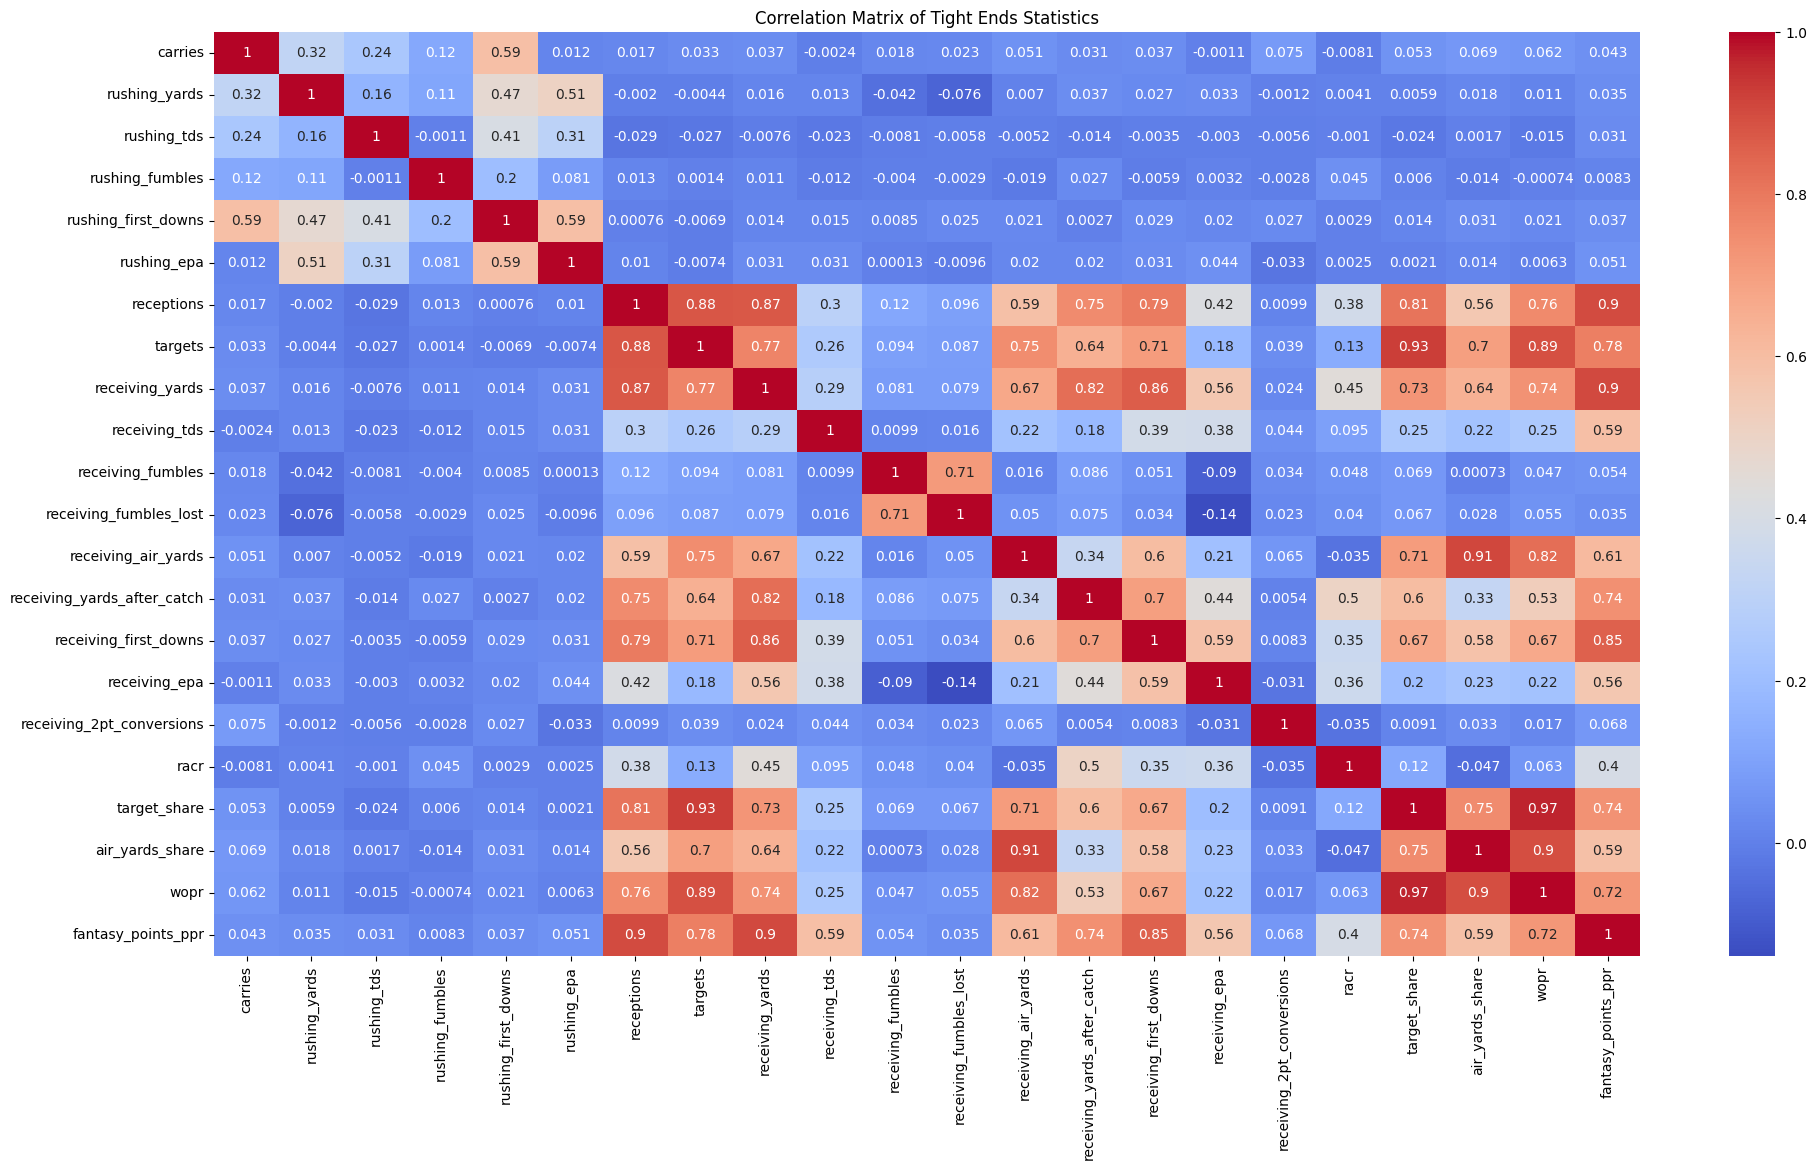

In [60]:
plt.figure(figsize=(23, 12))
te_correlation_matrix = players_historic_filtered_te_transformed.corr()
sns.heatmap(te_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Tight Ends Statistics')
plt.show()

In [61]:
# we can now see what features are most correlated with fantasy points
# Extract the correlations with fantasy points PPR
fantasy_points_corr_te = te_correlation_matrix['fantasy_points_ppr']

# Sort the correlations in descending order, excluding the correlation of the feature with itself
sorted_fantasy_points_corr_te = fantasy_points_corr_te.drop('fantasy_points_ppr').sort_values(ascending=False)

# Display the sorted correlations
print("Features Correlated with Fantasy Points PPR for TEs (Ranked):")
print(sorted_fantasy_points_corr_te)

Features Correlated with Fantasy Points PPR for TEs (Ranked):
receiving_yards                0.903322
receptions                     0.898723
receiving_first_downs          0.853873
targets                        0.783901
receiving_yards_after_catch    0.740682
target_share                   0.736023
wopr                           0.720296
receiving_air_yards            0.610907
receiving_tds                  0.590813
air_yards_share                0.587939
receiving_epa                  0.563731
racr                           0.398069
receiving_2pt_conversions      0.067676
receiving_fumbles              0.053652
rushing_epa                    0.050757
carries                        0.043376
rushing_first_downs            0.036942
rushing_yards                  0.034976
receiving_fumbles_lost         0.034575
rushing_tds                    0.031111
rushing_fumbles                0.008339
Name: fantasy_points_ppr, dtype: float64


# Feature Engineering & Selection

I will be outlining the top 10 most influential features for the models going forward. Note that depending on model performence, the features' inclusion of the models are subject to change.

### Quarterback

In [63]:
# univariate analysis on the most important features
from sklearn.feature_selection import SelectKBest, f_classif

X = players_historic_filtered_qb_transformed.drop(columns=['fantasy_points_ppr'])
y = players_historic_filtered_qb_transformed['fantasy_points_ppr']
select_k_best = SelectKBest(score_func=f_classif, k=10)
select_k_best.fit(X, y)

anova_scores = pd.Series(select_k_best.scores_, index=X.columns).sort_values(ascending=False)

p_values = select_k_best.pvalues_

anova_results = pd.DataFrame({
    'F-Value': anova_scores,
    'p-Value': p_values
}).sort_values(by='F-Value', ascending=False)

print("ANOVA F-test Results with p-values:")
print(anova_results)

ANOVA F-test Results with p-values:
                            F-Value       p-Value
passing_tds                3.329458  1.459790e-19
passing_yards              3.119437  4.325166e-14
passing_first_downs        2.605365  3.718418e-42
passing_epa                2.339498  1.970077e-46
completions                2.077069  1.930509e-02
passing_yards_after_catch  1.974772  1.721639e-01
dakota                     1.949345  7.412477e-02
attempts                   1.826851  9.758846e-01
passing_air_yards          1.725891  6.860594e-01
rushing_tds                1.442508  5.969134e-12
pacr                       1.424859  2.633882e-17
carries                    1.321762  3.106960e-31
passing_2pt_conversions    1.247674  2.195929e-25
rushing_yards              1.222673  2.556812e-03
rushing_epa                1.194219  4.292926e-06
interceptions              1.177157  9.509866e-17
rushing_first_downs        1.157652  2.157433e-04
sack_yards                 1.120626  5.450540e-03
rushing_fumble

For quarterbacks, the most influential features according to F-value score and p-value are:
1. passing_tds
2. passing_yards
3. passing_first_downs
4. passing_epa
5. completions
6. dakota
7. rushing_tds
8. pacr
9. carries
10. passing_2pt_conversions

### Wide Receivers

In [66]:
# univariate analysis on the most important features
X = players_historic_filtered_wr_transformed.drop(columns=['fantasy_points_ppr'])
y = players_historic_filtered_wr_transformed['fantasy_points_ppr']
select_k_best = SelectKBest(score_func=f_classif, k=10)
select_k_best.fit(X, y)

anova_scores = pd.Series(select_k_best.scores_, index=X.columns).sort_values(ascending=False)

p_values = select_k_best.pvalues_

anova_results = pd.DataFrame({
    'F-Value': anova_scores,
    'p-Value': p_values
}).sort_values(by='F-Value', ascending=False)

print("ANOVA F-test Results with p-values:")
print(anova_results)

ANOVA F-test Results with p-values:
                               F-Value        p-Value
receiving_yards              66.192680   2.555527e-11
receptions                   42.247941   3.033977e-86
receiving_first_downs        34.314984   6.682493e-26
targets                      16.321576   3.617340e-04
target_share                 12.800777   9.997640e-01
receiving_yards_after_catch  11.892055   2.021967e-05
wopr                         11.378888   6.681034e-05
receiving_tds                10.764091   0.000000e+00
receiving_epa                 8.588370   0.000000e+00
receiving_air_yards           7.694190   0.000000e+00
air_yards_share               6.619212   0.000000e+00
racr                          5.879977   1.233500e-02
rushing_yards                 3.491667   4.276882e-01
receiving_2pt_conversions     2.144133  1.303494e-267
rushing_tds                   2.037774   0.000000e+00
carries                       1.586422   0.000000e+00
rushing_first_downs           1.342292  5.7556

For wide receivers, the most influential features according to F-value score and p-value are:
1. receiving_yards
2. receptions
3. receiving_first_downs
4. targets
5. receiving_yards_after_catch
6. wopr
7. receiving_tds
8. receiving_epa
9. receiving_air_yards
10. air_yards_share

### Running Backs

In [67]:
# univariate analysis on the most important features
X = players_historic_filtered_rb_transformed.drop(columns=['fantasy_points_ppr'])
y = players_historic_filtered_rb_transformed['fantasy_points_ppr']
select_k_best = SelectKBest(score_func=f_classif, k=10)
select_k_best.fit(X, y)

anova_scores = pd.Series(select_k_best.scores_, index=X.columns).sort_values(ascending=False)

p_values = select_k_best.pvalues_

anova_results = pd.DataFrame({
    'F-Value': anova_scores,
    'p-Value': p_values
}).sort_values(by='F-Value', ascending=False)

print("ANOVA F-test Results with p-values:")
print(anova_results)

ANOVA F-test Results with p-values:
                               F-Value        p-Value
rushing_yards                11.451022  2.291031e-237
carries                       8.640312  5.843248e-311
rushing_first_downs           8.426204  1.282659e-194
rushing_tds                   7.182161   6.059309e-02
receptions                    5.702676   8.863939e-01
target_share                  5.393070  2.670126e-231
receiving_yards_after_catch   5.376945   6.169659e-38
receiving_yards               5.111188   4.822330e-22
targets                       5.084163  1.155890e-147
receiving_tds                 4.755608  5.799518e-127
wopr                          4.575023  7.022276e-128
receiving_first_downs         4.074709  9.885244e-116
receiving_2pt_conversions     2.574190   1.111240e-03
receiving_epa                 2.567002   8.303563e-02
rushing_epa                   2.527810   2.102722e-04
racr                          2.364650  7.751229e-137
rushing_2pt_conversions       2.031305   5.046

For running backs, the most influential features according to F-value score and p-value are:
1. rushing_yards
2. carries
3. rushing_first_downs
4. rushing_tds
5. target_share
6. receiving_yards_after_catch
7. receiving_yards
8. targets
9. receiving_tds
10. wopr

### Tight Ends

In [68]:
# univariate analysis on the most important features
X = players_historic_filtered_te_transformed.drop(columns=['fantasy_points_ppr'])
y = players_historic_filtered_te_transformed['fantasy_points_ppr']
select_k_best = SelectKBest(score_func=f_classif, k=10)
select_k_best.fit(X, y)

anova_scores = pd.Series(select_k_best.scores_, index=X.columns).sort_values(ascending=False)

p_values = select_k_best.pvalues_

anova_results = pd.DataFrame({
    'F-Value': anova_scores,
    'p-Value': p_values
}).sort_values(by='F-Value', ascending=False)

print("ANOVA F-test Results with p-values:")
print(anova_results)

ANOVA F-test Results with p-values:
                               F-Value        p-Value
receiving_yards              38.768093   5.479121e-12
receptions                   35.244622   2.801821e-04
receiving_first_downs        21.107992   4.087763e-33
targets                      12.873382   1.000000e+00
receiving_yards_after_catch  10.358704   9.384118e-49
target_share                  9.313018   1.883943e-06
wopr                          8.574326   0.000000e+00
receiving_tds                 7.885042  9.162358e-256
receiving_epa                 5.935193   0.000000e+00
receiving_air_yards           5.594783  3.414795e-160
air_yards_share               4.711113   2.860603e-09
rushing_first_downs           3.316203   2.523583e-29
racr                          3.074003  3.763483e-107
rushing_tds                   2.710226  1.253444e-210
receiving_fumbles_lost        2.559314   0.000000e+00
receiving_2pt_conversions     2.467532  1.923576e-115
carries                       1.807401   4.717

For tight ends, the most influential features according to F-value score and p-value are:
1. receiving_yards
2. receptions
3. receiving_first_downs
4. receiving_yards_after_catch
5. target_share
6. wopr
7. receiving_tds
8. receiving_epa
9. receiving_air_yards
10. air_yards_share